In [5]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


Root Mean Squared Error: 30.01


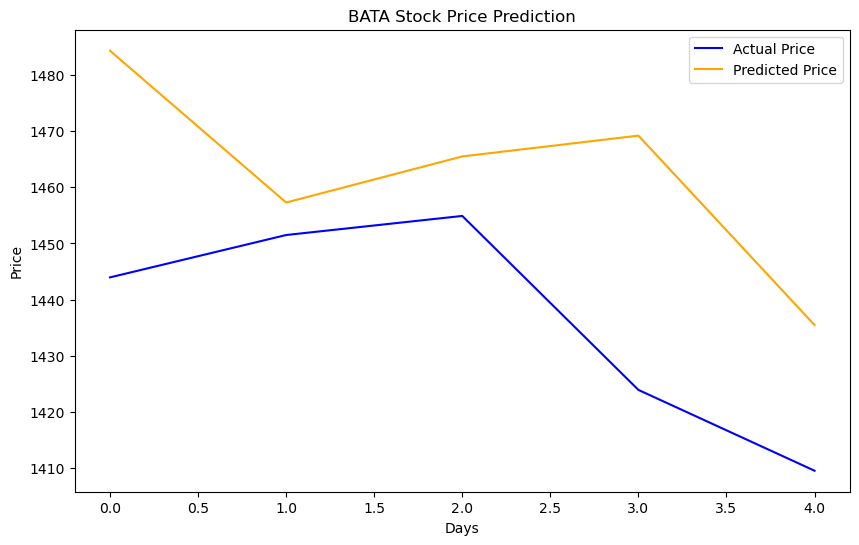

In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Load Historical Stock Data from CSV
file_path = 'BATA Historical Data.csv'
stock_data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# Remove commas and convert numeric columns to floats
stock_data['High'] = stock_data['High'].replace({',': ''}, regex=True).astype(float)
stock_data['Close'] = stock_data['Close'].replace({',': ''}, regex=True).astype(float)

# Step 2: Preprocess the Data
# We will use the 'High' price to predict the future price
stock_data['Price'] = stock_data['High'].shift(-1)  # Shift 'High' price to create a future price column
stock_data = stock_data.dropna()  # Drop rows with NaN values

# Step 3: Define Features and Labels
X = stock_data[['High']].values  # Features
y = stock_data['Price'].values  # Labels

# Step 4: Split the Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 5: Create and Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Make Predictions
predictions = model.predict(X_test)

# Step 7: Evaluate the Model
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error: {rmse:.2f}')

# Step 8: Plot Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Actual Price', color='blue')
plt.plot(range(len(predictions)), predictions, label='Predicted Price', color='orange')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()